In [1]:
import pandas as pd
import nltk
import string
import joblib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import PlaintextCorpusReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAarif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MAarif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAarif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MAarif\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
#df=pd.read_csv('data/bbc_news_scraping.csv')
df=pd.read_csv('data/news_data.csv')

In [8]:
from nltk.corpus import PlaintextCorpusReader

In [3]:
df.head()

,Section,Title,Content,category
0,business,"RBI maintains status quo, keeps repo rate unch...",RBI Governor Shaktikanta Das said the monetary...,business
1,business,RIL AGM 2023: Mukesh Ambani to remain Reliance...,Mukesh Ambani said he will especially mentor A...,business
2,business,"At RIL AGM, Mukesh Ambani hails Network18's 'g...",Pointing RIL’s progress in the media and enter...,business
3,business,‘JioBharat Phone is about digital democracy an...,Experts of the telecom industry are calling th...,business
4,business,India's wealthiest woman Savitri Jindal crosse...,"A power and steel conglomerate, OP Jindal Grou...",business


In [4]:
stopwords=set(stopwords.words('english'))

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Function to clean and preprocess text
def preprocess_text(text):
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization using WordNet
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the preprocessing function to the 'description' column
df['Title'] = df['Title'].apply(preprocess_text)

# Display the cleaned DataFrame
print(df[['Title', 'Title']])

C:\Users\MAarif\AppData\Local\Temp\ipykernel_16292\2833099690.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


                                                  Title  \
0     rbi maintains status quo keep repo rate unchanged   
1     ril agm mukesh ambani remain reliance chairman...   
2     ril agm mukesh ambani hail network great progr...   
3     jiobharat phone digital democracy empowerment ...   
4     india wealthiest woman savitri jindal cross to...   
...                                                 ...   
1805  jasprit bumrah becomes first indian pacer atta...   
1806  espn fox warner bros discovery unite create ne...   
1807  ad hoc panel wrestling tell state unit send en...   
1808  paris olympics life set like usual parisian am...   
1809  paris olympics challenging need smarter time p...   

                                                  Title  
0     rbi maintains status quo keep repo rate unchanged  
1     ril agm mukesh ambani remain reliance chairman...  
2     ril agm mukesh ambani hail network great progr...  
3     jiobharat phone digital democracy empowerment ...  
4

In [12]:
#Removing stopwords
def clean(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Section   1810 non-null   object
 1   Title     1810 non-null   object
 2   Content   1810 non-null   object
 3   category  1810 non-null   object
dtypes: object(4)
memory usage: 56.7+ KB


In [13]:
df['Title']=df['Title'].apply(clean)

In [14]:
df.head()

,Section,Title,Content,category
0,business,rbi maintains status quo keep repo rate unchanged,RBI Governor Shaktikanta Das said the monetary...,business
1,business,ril agm mukesh ambani remain reliance chairman...,Mukesh Ambani said he will especially mentor A...,business
2,business,ril agm mukesh ambani hail network great progr...,Pointing RIL’s progress in the media and enter...,business
3,business,jiobharat phone digital democracy empowerment ...,Experts of the telecom industry are calling th...,business
4,business,india wealthiest woman savitri jindal cross to...,"A power and steel conglomerate, OP Jindal Grou...",business


In [15]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [16]:
#Removing punctuation
def clean_punc(text):
  return ''.join(x for x in text if x not in punctuations_list)

In [17]:
df['Title']=df['Title'].apply(lambda x:clean_punc(x))

In [18]:
df.head()

,Section,Title,Content,category
0,business,rbi maintains status quo keep repo rate unchanged,RBI Governor Shaktikanta Das said the monetary...,business
1,business,ril agm mukesh ambani remain reliance chairman...,Mukesh Ambani said he will especially mentor A...,business
2,business,ril agm mukesh ambani hail network great progr...,Pointing RIL’s progress in the media and enter...,business
3,business,jiobharat phone digital democracy empowerment ...,Experts of the telecom industry are calling th...,business
4,business,india wealthiest woman savitri jindal cross to...,"A power and steel conglomerate, OP Jindal Grou...",business


In [19]:
#Tokenization
tokenizer=RegexpTokenizer(r'\w+')

In [20]:
df['Title']=df['Title'].apply(tokenizer.tokenize)

In [21]:
df.head()

,Section,Title,Content,category
0,business,"[rbi, maintains, status, quo, keep, repo, rate...",RBI Governor Shaktikanta Das said the monetary...,business
1,business,"[ril, agm, mukesh, ambani, remain, reliance, c...",Mukesh Ambani said he will especially mentor A...,business
2,business,"[ril, agm, mukesh, ambani, hail, network, grea...",Pointing RIL’s progress in the media and enter...,business
3,business,"[jiobharat, phone, digital, democracy, empower...",Experts of the telecom industry are calling th...,business
4,business,"[india, wealthiest, woman, savitri, jindal, cr...","A power and steel conglomerate, OP Jindal Grou...",business


In [22]:
#Stemming
st=PorterStemmer()

In [23]:
def stemming(text):
  stemmed_words=[st.stem(word) for word in text]
  return ' '.join(stemmed_words)

In [24]:
df['Title']=df['Title'].apply(stemming)

In [41]:
df.head()

,Section,Title,Content,category,Topic
0,business,rbi maintain statu quo keep repo rate unchang,RBI Governor Shaktikanta Das said the monetary...,business,1
1,business,ril agm mukesh ambani remain relianc chairman ...,Mukesh Ambani said he will especially mentor A...,business,1
2,business,ril agm mukesh ambani hail network great progr...,Pointing RIL’s progress in the media and enter...,business,1
3,business,jiobharat phone digit democraci empower best s...,Experts of the telecom industry are calling th...,business,1
4,business,india wealthiest woman savitri jindal cross to...,"A power and steel conglomerate, OP Jindal Grou...",business,0


In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [27]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Title'])

In [28]:
dense_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [42]:
cat={'business':0,'health':1,'sports':2,'entertainment':3}
df['Topic'] = df['category'].replace(cat)
df['Topic'].unique()

array([0, 3, 1, 2], dtype=int64)

In [29]:
num_clusters = 4
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=50)
cluster_labels = kmeans.fit_predict(tfidf_matrix)
cluster_labels

C:\Users\MAarif\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 1, 1, 0])

In [39]:
df['Topic']=cluster_labels

In [40]:
# Display a sample of articles from each cluster
for cluster_label in range(num_clusters):
    print(f"\nCluster {cluster_label} Articles:")
    cluster_articles = df[df['Topic'] == cluster_labels]['Title'].sample(min(5, len(df)))
    print(cluster_articles)


Cluster 0 Articles:
510     richa chadha ali fazal announc pregnanc say ti...
1756    tehran grey zone tactic tel aviv iran help ham...
1181    karnataka log new covid case state impos curb ...
1671    explain saudi arabia clever plan dodg atp tour...
1273            prostat cancer symptom vulner test option
Name: Title, dtype: object

Cluster 1 Articles:
777     watch ahaan panday arriv yrf offic sign contra...
835     actor hous worth r crore also own chalet switz...
1519    ad hoc panel wrestl tell state unit send entri...
1339    distract india hockey coach craig fulton varun...
600     richa chadha ali fazal announc pregnanc say ti...
Name: Title, dtype: object

Cluster 2 Articles:
1316      rees witherspoon think okay eat snow scienc say
955     actor hous worth r crore also own chalet switz...
643     legendari singer al raghavan husband mn rajam ...
164     india wealthiest woman savitri jindal cross to...
1107    watch ahaan panday arriv yrf offic sign contra...
Name: Title, 

In [35]:
cluster_dictionary={0:'Entertainment',1:'Business',2:'Sports',3:'Health'}

In [36]:
df['Topic']=df['Topic'].replace(cluster_dictionary)

In [43]:
df.head()

,Section,Title,Content,category,Topic
0,business,rbi maintain statu quo keep repo rate unchang,RBI Governor Shaktikanta Das said the monetary...,business,0
1,business,ril agm mukesh ambani remain relianc chairman ...,Mukesh Ambani said he will especially mentor A...,business,0
2,business,ril agm mukesh ambani hail network great progr...,Pointing RIL’s progress in the media and enter...,business,0
3,business,jiobharat phone digit democraci empower best s...,Experts of the telecom industry are calling th...,business,0
4,business,india wealthiest woman savitri jindal cross to...,"A power and steel conglomerate, OP Jindal Grou...",business,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df['Title'], df['Topic'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00       133

    accuracy                           1.00       362
   macro avg       1.00      1.00      1.00       362
weighted avg       1.00      1.00      1.00       362



In [52]:
joblib.dump((classifier,tfidf_vectorizer),'news_classifier.joblib')

['news_classifier.joblib']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Assuming 'df' has the 'cleaned_description' and 'topic' columns
# Replace this with your actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Title'],  # Features (cleaned descriptions)
    df['category'],  # Labels (topics)
    test_size=0.2,  # Adjust the test_size as needed
    random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the training set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Save the model and vectorizer to a pickle file
#joblib.dump((naive_bayes_classifier, tfidf_vectorizer), 'news_model.pkl')
joblib.dump((naive_bayes_classifier,tfidf_vectorizer),'news_classifier.joblib')
# Predict on the testing set
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

     business       1.00      1.00      1.00        92
entertainment       1.00      1.00      1.00       133
       health       1.00      1.00      1.00        44
       sports       1.00      1.00      1.00        93

     accuracy                           1.00       362
    macro avg       1.00      1.00      1.00       362
 weighted avg       1.00      1.00      1.00       362



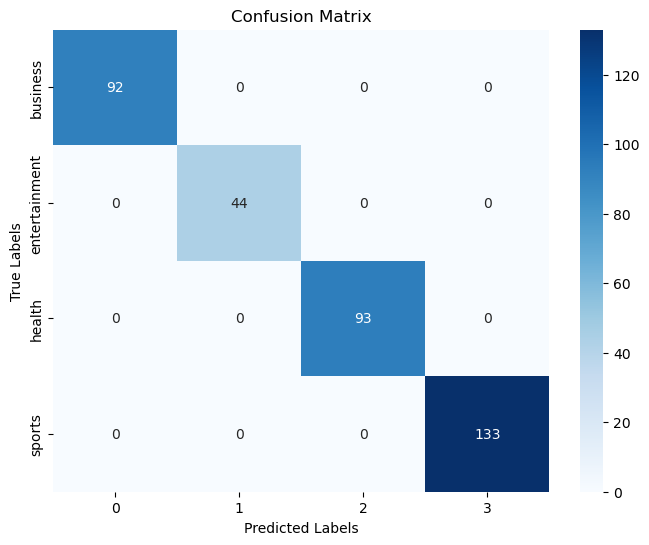

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_test' and 'y_pred' from your code

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['Topic'].unique()),
            yticklabels=sorted(df['category'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
import joblib
model, vectorizer = joblib.load('news_classifier.joblib')

new_article='India to have match with england'

new_article_tfidf = vectorizer.transform([new_article])

prediction = model.predict(new_article_tfidf)

print(prediction)

['sports']
